# Natural Language Processing - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** June 2021  
**Python version:** Python 3.6+     
**License:** MIT License  
**Recommended environment: `researchPython`**

In [1]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primariy reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`NLP_Notebook.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/Python_NLP_Tutorial/blob/master/NLP_Notebook.ipynb)  

## Import required packages

In [2]:
import os, re
import pandas as pd
import numpy as np

In [3]:
import en_core_web_lg
nlp = en_core_web_lg.load()

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: center; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 1 </span>
</div>  

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

## 1) Perform basic operations on a sample earnings transcript text file

### 1a) Load the following text file: `data > example_transcript.txt` into Python

### 1b) Print the first 400 characters of the text file you just loaded

### 1c) Count the number of times the words `Alex` and `Angie` are mentioned

### 1c) Use the provided Regular Expression to capture all numbers prior to a "%"  
Use this regular expression: `\W([\.\d]{,})%`  
**You can play around with this regular expression here: <a href='https://bit.ly/3heIqoG'>Test on Pythex.org</a>**

**Hint:** use the `re.findall()` function

### Extra: try to explain to a neighbour / group member what the regular expression is doing
You can use the cheatsheet on Pythex.org for reference.  

### 1d) Load the text into a Spacy object and split it into a list of  sentences

Make sure to evaluate how well it worked by inspecting various elements of the sentence list.

#### What is the 150th sentence?

### Why is there a difference between showing a string and printing a string? See the illustration below:

In [26]:
demo_sentence = "This is a test sentence, the keyword:\x20\nSeattle"

In [27]:
demo_sentence

'This is a test sentence, the keyword: \nSeattle'

In [28]:
print(demo_sentence)

This is a test sentence, the keyword: 
Seattle


### 1e) Parse out the following 3 blocks of text:

* The meta data at the top   
* The presentation portion  
* The Q&A portion

**Note 1:** I recommend to do this based on the full text (i.e., the raw string as you loaded it) not the list of sentences.   
**Note 2:** Don't use the location (e.g., `[:123]`), that wouldn't work if you had more than 1 transcript.

### 1f) How many characters, sentences, words (tokens) does the presentation portion and the Q&A portion have? 

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: left; margin-left: 0px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Note: problems 1g and 1h are quite challenging, it might make sense to skip them until the end and move on to questions 2 and 3 first.</span>

### 1g) Create a list of all the questions during the Q&A and include the person that asked the question   

You should end up with 20 questions.

### 1h) Modify the Q&A list by adding in the answer + answering person

This is what the first entry should (rougly) look like:
```python
qa_list[0] = 
{
  'q_person': 'Christopher McGratty ',
  'question': 'Great, thanks, good afternoon. Kevin maybe you could start -- or Alex on the margin, obviously the environment has got a little bit tougher for the banks. But you have this -- the ability to bring down deposit costs, which you talked about in your prepared remarks. I appreciate in the guidance for the first quarter, but if the rate outlook remains steady, how do we think about ultimate stability in the flow and the margin, where and kind of when?',
  'answers': [{
    'name': 'Alex Ko ',
    'answer': 'Sure, sure. As I indicated, we would expect to have continued compression next quarter given the rate cuts that we have experienced especially October rate cut, it will continue next quarter. But as we indicated, our proactive deposit initiative as well as very disciplined pricing on the deposit, even though we have a very competitive -- competition on the loan rate is very still severe. We would expect to stabilize in the second quarter of 2020 in terms of net interest margin and then second half of the year, we would expect to start to increase.'
  }]
}
```
>

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 2:</span>
</div>

## 2) Extract state name counts from MD&As

Follow Garcia and Norli (2012) and extract state name counts from MD&As.

#### References  

Garcia, D., & Norli, Ø. (2012). Geographic dispersion and stock returns. Journal of Financial Economics, 106(3), 547-565.

#### Data to use

I have included a random selection of 20 pre-processed MDA filings in the `data > MDA_files` folder. The filename is the unique identifier.   

You will also find a file called `MDA_META_DF.xlsx` in the "data" folder, this contains the following meta-data for eaching MD&A: 
* filing date  
* cik   
* company name  
* link to filing

### 2a) Load data into a dictionary with as key the filename and as value the content of the text file

The files should all be in the following folder:  
```
os.path.join('data', 'MDA_files')
```

### 2b) Load state name data into a DataFrame  
**Note:** state names are provided in the `state_names.xlsx` file in the "data" folder.

### 2c) Count the number of times that each U.S. state name is mentioned in each MD&A   
**Hint:** save the counts to a list where each entry is a list that contains the following three items: [*filename*, *state_name*, *count*], like this:
> [   
 ['21344_0000021344-16-000050.txt', 'Alabama', 0],  
 ['21344_0000021344-16-000050.txt', 'Alaska', 0],  
 ['21344_0000021344-16-000050.txt', 'Arizona', 0],   
> ....  
>['49071_0000049071-16-000117.txt', 'West Virginia', 0],  
 ['49071_0000049071-16-000117.txt', 'Wisconsin', 0],  
 ['49071_0000049071-16-000117.txt', 'Wyoming', 0]   
 ]   
 
You can verify that it worked by checking whether the the 80th element (i.e. `list[79]`) equals:  
> ['21510_0000021510-16-000074.txt', 'New Jersey', 2]

(I looped over the companies first, and then over the states)

### 2d) Convert the list you created in `2c` into a Pandas DataFrame and save it as an Excel sheet

**Hint:** Use the `columns=[...]` parameter to name the columns

## 3) Create sentiment score based on Loughran and McDonald (2011)   

Create a sentiment score for MD&As based on the Loughran and McDonald (2011) word lists.  

#### References  

Loughran, T., & McDonald, B. (2011). When is a liability not a liability? Textual analysis, dictionaries, and 10‐Ks. The Journal of Finance, 66(1), 35-65.

#### Data to use

I have included a random selection of 20 pre-processed MDA filings in the `data > MDA_files` folder. The filename is the unique identifier.   

You will also find a file called `MDA_META_DF.xlsx` in the "data" folder, this contains the following meta-data for eaching MD&A: 
* filing date  
* cik   
* company name  
* link to filing

### 3a) Load the Loughran and McDonald master dictionary    
**Note:** The Loughran and McDonald dictionary is included in the "data" folder: `LoughranMcDonald_MasterDictionary_2014.xlsx `

### 3b) Create two lists: one containing all the negative words and the other one containing all the positive words   
**Tip:** I recommend to change all words to lowercase in this step so that you don't need to worry about that later

### 3c) For each MD&A calculate the *total* number of times negative and positive words are mentioned

**Note:** make sure you also convert the text to lowercase!

**Hint:** save the counts to a list where each entry is a list that contains the following three items: [*filename*, *total pos count*, *total neg count*], like this:
> [   
    ['21344_0000021344-16-000050.txt', 1166, 2318],   
    ['21510_0000021510-16-000074.txt', 606, 1078],  
    ['21665_0001628280-16-011343.txt', 516, 1058],      
> ....  
    ['47217_0000047217-16-000093.txt', 544, 928],  
    ['47518_0001214659-16-014806.txt', 482, 974],  
    ['49071_0000049071-16-000117.txt', 954, 1636]    
 ]   

You can verify that it worked by checking whether the the 16th element (i.e. `list[15]`) equals:  
> ['43920_0000043920-16-000025.txt', 558, 1568]

### 3d) Convert the list created in 3c into a Pandas DataFrame  
**Hint:** Use the `columns=[...]` parameter to name the columns

### 3e) Create a new column with a "sentiment score" for each MD&A

Use the following imaginary sentiment score:  
$$\frac{(Num\ Positive\ Words - Num\ Negative\ Words)}{Sum\ of Pos\ and\ Neg\ Words}$$


## 3f) Use the `MDA_META_DF` file to add the company name, filing date, and CIK to the sentiment dataframe

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 3: "Ties, I am bored, please give me a challenge"</span>
</div>

**Note:** You don't have to complete part 3 if you are handing in the problems for credit.  

------

## 1) Visualize the entities in the following sentences:   
```python
example_string = "John Smith is a Professor at the University of Washington. Which is located in Seattle."
```

What you should get:

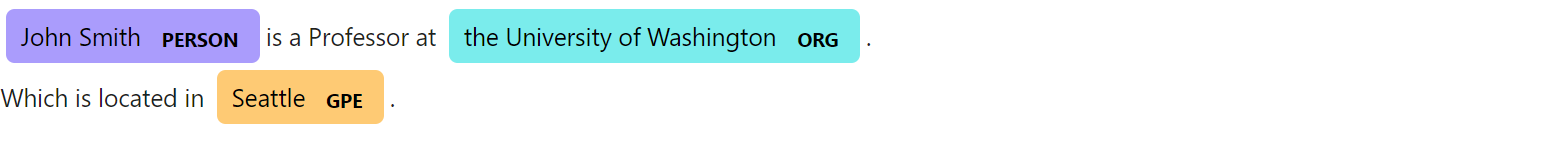

## 2) For each sentence in `data > example_transcript.txt` find the sentences that is closest in semantic similarity  

Use the built-in word vectors that come with Spacy. Limit your sample to sentences with more than 100 characters.

This is what you should get: 
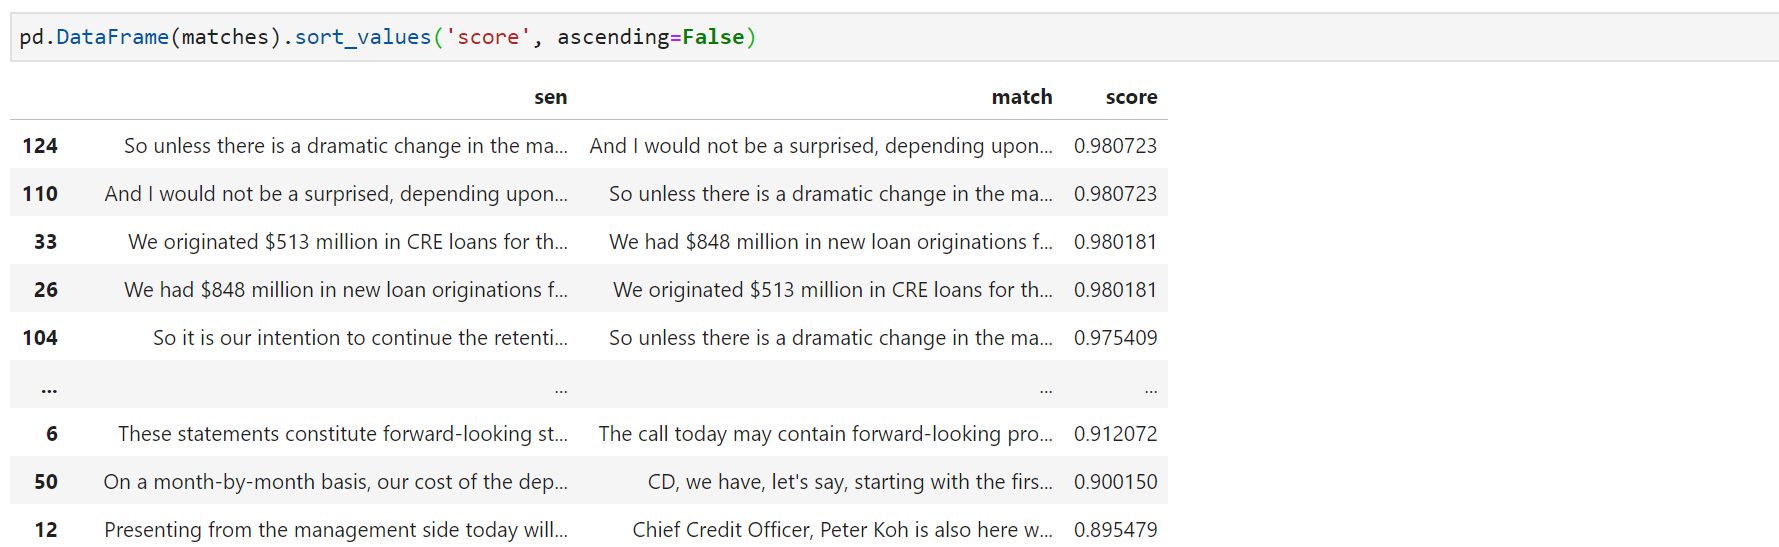